<a href="https://colab.research.google.com/github/nayrr25/Aplicaciones-Financieras-e-IA/blob/main/Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/nayrr25/Aplicaciones-Financieras-e-IA/blob/main/Examen1_NRR.ipynb)

In [3]:
import pandas as pd

from pprint import pprint

import numpy as np

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

import plotly.express as px

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers

import plotly.graph_objects as go

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Examen I.
# Estudiante: Nancy Rodríguez Ramos

# Aplicaciones Financieras


Desarrolle un algoritmo para tratar de realizar predicciones dado un DataSet (El algoritmo puede
ser cualquiera de los vistos en clase).
Descripción de los datos: El archivo tiene nombre “AMF_data.csv” y contiene las variables

• Share: Stock en el que están invirtiendo
• Date: Fecha en que lo realizó
• Trader: Etiqueta con la que se identifica al inversor
• OTR: Número de intercambios que realizó (trades)
• OCR: Eventos de tipo cancelación
• OMR: Eventos de tipo modificación
• type: Tipo de trader (HFT: High Frequency trader, NON-HFT)


• Para más información sobre las demás características ir a
https://challengedata.ens.fr/participants/challenges/50/ (para poder ingresar necesitará
registrarse y luego copiar la dirección en su navegador)
Realice los siguientes pasos:
• Defina cual será su variable objetivo
• Separe sus datos en 70% para entrenamiento y 30% para validación
• Realice un reescalamiento de los datos (alguno de los usados en clase)
• Convierta las variables categóricas a numéricas con alguno de los metodos vistos en clase
(Dummificación, OneHotEncoding, etc)
• Entrene su algoritmo
• Compare sus datos obtenidos con los datos reales
El entregable deberá ser un archivo .ipynb que contenga:
1. Exploración de los datos
2. Pasos del algoritmo
3. Evaluación e la predicción
4. Gráfica comparando los datos reales con los predichos por el modelo
5. Conclusiones
Extra:
¿Por qué utilizar el modelo que desarrolló y no otro?
¿En caso de haber tenido que escoger otro, que modelo usaría?

# Objetivo:

Predecir el tipo de trader para cada operación.
En este caso se realizará dicha predicción con Regresión Lineal.

In [6]:
#Funciones
sep= "\n-------------------\n"

# Exploración de los datos

In [7]:
#Exploración de datos
df = pd.read_csv('/content/drive/MyDrive/Aplicaciones Financieras/AMF_data.csv')

In [8]:
df

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NON HFT
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NON HFT
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NON HFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,105778,Isin_84,Date_27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NON HFT
54295,105779,Isin_102,Date_18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NON HFT
54296,105780,Isin_12,Date_13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NON HFT
54297,105781,Isin_27,Date_30,Trader_60,1.179191,204.000000,NaN,0.0,384.893976,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,NON HFT


In [9]:
#valores únicos de la variable type
df["type"].unique()

array(['NON HFT', 'HFT'], dtype=object)

In [10]:
#Análisis de Datos faltantes

In [11]:
na_values = (df.isna().sum().sort_values() / len(df)).reset_index(name = 'n')
na_values

,index,n
0,Index,0.000000
1,MeanNbTradesBySecond,0.000000
2,MaxNbTradesBySecond,0.000000
3,NbTradeVenueMic,0.000000
4,max_lifetime_cancel,0.000000
5,90_p_lifetime_cancel,0.000000
6,75_p_lifetime_cancel,0.000000
7,NbSecondWithAtLeatOneTrade,0.000000
8,med_lifetime_cancel,0.000000
9,10_p_lifetime_cancel,0.000000


In [12]:
#Variables con porcentaje de valores perdidos más del 10%
aux = na_values[na_values['n']>0.1]
aux

,index,n
30,min_dt_TV1_TV4,0.340522
31,mean_dt_TV1_TV4,0.340522
32,med_dt_TV1_TV4,0.340522
33,min_dt_TV1_TV2,0.341609
34,med_dt_TV1_TV2,0.341609
35,mean_dt_TV1_TV2,0.341609
36,min_dt_TV1_TV3,0.342621
37,mean_dt_TV1_TV3,0.342621
38,med_dt_TV1_TV3,0.342621
39,OMR,0.672941


In [13]:
#OMR tiene mucho nulos , en la práctica se prifiere que las variables inclusive no tengan más del 5% de nulos, pero acá lo analizaré esperando que no tengan más del 10%

In [14]:
df["OMR"]

0         12.500000
1         21.571429
2        118.250000
3         29.000000
4               NaN
            ...    
54294           NaN
54295           NaN
54296           NaN
54297           NaN
54298           NaN
Name: OMR, Length: 54299, dtype: float64

In [15]:
# Si se quisiera borrar todos los que tienen más del 10% de nulos, se borran las siguientes variables
columns_to_drop = list(aux['index'])

In [16]:
columns_to_drop

['min_dt_TV1_TV4',
 'mean_dt_TV1_TV4',
 'med_dt_TV1_TV4',
 'min_dt_TV1_TV2',
 'med_dt_TV1_TV2',
 'mean_dt_TV1_TV2',
 'min_dt_TV1_TV3',
 'mean_dt_TV1_TV3',
 'med_dt_TV1_TV3',
 'OMR']

In [17]:
#OMR aunque podría ser importante, sin embargo tiene muchos nulos.

In [18]:
#cantidad de variables con muchos nulos (más del 10%)
len(columns_to_drop)

10

In [19]:
#Gráfico de valores faltantes
px.bar(na_values, "index", "n")

In [20]:
#Borrar las variables con muchos nulos (más del 10%)
data_filt = df.drop(columns=columns_to_drop)
data_filt

,Index,Share,Day,Trader,OTR,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade,type
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,0.0,5117.830300,0.000000,419.688500,...,23151.8380,23151.8380,1,7,2.750000,351.702399,9639.216031,1585.079495,4,NON HFT
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,0.0,1846.968401,0.000074,0.003374,...,21433.6840,21433.6840,1,17,5.933333,0.000066,493.559196,0.000901,15,NON HFT
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,0.0,686.300630,0.000071,0.000599,...,1953.6235,10842.4640,1,20,5.063492,0.000018,163.954785,0.000770,63,NON HFT
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,0.0,2174.335265,0.000000,6.152666,...,19187.7190,19187.7190,1,8,4.250000,0.000148,1232.562133,0.004301,4,NON HFT
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,0.0,944.008551,0.000071,0.001364,...,23164.5140,23164.5140,1,19,3.710526,0.000025,248.073927,0.001364,38,NON HFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,105778,Isin_84,Date_27,Trader_60,1.150000,23.000000,0.0,736.500080,0.000000,0.000188,...,7609.9443,7609.9443,1,15,6.666667,0.001000,927.968000,0.004000,3,NON HFT
54295,105779,Isin_102,Date_18,Trader_60,1.352941,23.000000,0.0,63.672695,0.000000,0.000963,...,567.1530,567.1530,1,4,2.428571,0.001000,143.065500,0.569000,7,NON HFT
54296,105780,Isin_12,Date_13,Trader_60,1.146667,86.000000,0.0,708.440816,0.000000,0.000578,...,23448.5250,23448.5250,1,21,4.687500,0.001000,1157.596000,2.488000,16,NON HFT
54297,105781,Isin_27,Date_30,Trader_60,1.179191,204.000000,0.0,384.893976,0.000000,0.000536,...,19157.8090,19157.8090,1,30,4.942857,0.001000,435.646015,1.001000,35,NON HFT


In [21]:
#comparación entre la base filtrada y la original

print("Datos originales\n")
print(df.dtypes.value_counts())

print(sep)
print("Datos filtrado\n")
data_filt.dtypes.value_counts()

Datos originales

float64    32
int64       4
object      4
dtype: int64

-------------------

Datos filtrado



float64    22
int64       4
object      4
dtype: int64

In [22]:
data_filt.shape

(54299, 30)

In [23]:
data_filt.columns

Index(['Index', 'Share', 'Day', 'Trader', 'OTR', 'OCR', 'min_time_two_events',
       'mean_time_two_events', '10_p_time_two_events', 'med_time_two_events',
       '25_p_time_two_events', '75_p_time_two_events', '90_p_time_two_events',
       'max_time_two_events', 'min_lifetime_cancel', 'mean_lifetime_cancel',
       '10_p_lifetime_cancel', 'med_lifetime_cancel', '25_p_lifetime_cancel',
       '75_p_lifetime_cancel', '90_p_lifetime_cancel', 'max_lifetime_cancel',
       'NbTradeVenueMic', 'MaxNbTradesBySecond', 'MeanNbTradesBySecond',
       'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1', 'NbSecondWithAtLeatOneTrade',
       'type'],
      dtype='object')

In [24]:
#Cantidad de datos, según las categorías de la variable type
data_filt['type'].value_counts(dropna = False)

HFT        31950
NON HFT    22349
Name: type, dtype: int64

In [25]:
#tipo de variable de cada una de las contenidas en el dataframe data_filt
data_filt.dtypes

Index                           int64
Share                          object
Day                            object
Trader                         object
OTR                           float64
OCR                           float64
min_time_two_events           float64
mean_time_two_events          float64
10_p_time_two_events          float64
med_time_two_events           float64
25_p_time_two_events          float64
75_p_time_two_events          float64
90_p_time_two_events          float64
max_time_two_events           float64
min_lifetime_cancel           float64
mean_lifetime_cancel          float64
10_p_lifetime_cancel          float64
med_lifetime_cancel           float64
25_p_lifetime_cancel          float64
75_p_lifetime_cancel          float64
90_p_lifetime_cancel          float64
max_lifetime_cancel           float64
NbTradeVenueMic                 int64
MaxNbTradesBySecond             int64
MeanNbTradesBySecond          float64
min_dt_TV1                    float64
mean_dt_TV1 

In [26]:
#Análisis de Variables con poca variación

In [27]:
# Creo un df que Incluiye números enteros (integers) y números flotantes (floats):
df_numericas = data_filt.select_dtypes(include=['int', 'float'])

# Ahora 'df_numericas' contiene solo las columnas numéricas del DataFrame original.
df_numericas

,Index,OTR,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,...,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade
0,1,2.272727,8.333333,0.0,5117.830300,0.000000,419.688500,10.722543,984.320560,23151.83800,...,23151.83800,23151.8380,23151.8380,1,7,2.750000,351.702399,9639.216031,1585.079495,4
1,2,1.696629,25.166667,0.0,1846.968401,0.000074,0.003374,0.000204,8.768699,2671.48830,...,808.26230,21433.6840,21433.6840,1,17,5.933333,0.000066,493.559196,0.000901,15
2,3,1.482759,47.300000,0.0,686.300630,0.000071,0.000599,0.000129,5.725427,448.88360,...,418.23984,1953.6235,10842.4640,1,20,5.063492,0.000018,163.954785,0.000770,63
3,4,1.705882,14.500000,0.0,2174.335265,0.000000,6.152666,0.000945,62.444176,19187.71900,...,19187.71900,19187.7190,19187.7190,1,8,4.250000,0.000148,1232.562133,0.004301,4
4,5,1.517730,26.750000,0.0,944.008551,0.000071,0.001364,0.000146,2.225420,273.45676,...,21903.78300,23164.5140,23164.5140,1,19,3.710526,0.000025,248.073927,0.001364,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,105778,1.150000,23.000000,0.0,736.500080,0.000000,0.000188,0.000039,0.003226,1228.04750,...,7609.94430,7609.9443,7609.9443,1,15,6.666667,0.001000,927.968000,0.004000,3
54295,105779,1.352941,23.000000,0.0,63.672695,0.000000,0.000963,0.000176,70.822190,307.08710,...,567.15300,567.1530,567.1530,1,4,2.428571,0.001000,143.065500,0.569000,7
54296,105780,1.146667,86.000000,0.0,708.440816,0.000000,0.000578,0.000062,1.023857,4.95412,...,23448.52500,23448.5250,23448.5250,1,21,4.687500,0.001000,1157.596000,2.488000,16
54297,105781,1.179191,204.000000,0.0,384.893976,0.000000,0.000536,0.000242,1.288446,119.05335,...,19157.80900,19157.8090,19157.8090,1,30,4.942857,0.001000,435.646015,1.001000,35


In [28]:
from sklearn.feature_selection import VarianceThreshold

# Se Crea un objeto VarianceThreshold con el umbral deseado (0.90 en este caso).
var_filter = VarianceThreshold(threshold=0.90)

# Se Ajusta el objeto a los datos.
var_filter.fit(df_numericas)

# Se Obtiene las columnas con varianza por debajo del umbral.
constant_columns = [column for column in df_numericas.columns
                    if column not in df_numericas.columns[var_filter.get_support()]]

# Las columnas en 'constant_columns' son las que tienen varianza por debajo de 0.90.
print(constant_columns)


[]


In [29]:
#En este caso no hay variables numéricas con varianza baja

Escalamiento de los datos

In [30]:
scaler = StandardScaler()
print(scaler)

StandardScaler()


In [31]:
scaler = StandardScaler()
data_num_sc = pd.DataFrame(scaler.fit_transform(df_numericas), columns = df_numericas.columns, index = df_numericas.index)
#el siguiente df cuenta con un escalamiento de los datos de las varaibles numéricas del df original
data_num_sc

,Index,OTR,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,...,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade
0,-1.536320,-0.264548,-0.171436,-0.07724,0.136368,-0.087214,-0.215227,-0.131280,-0.499610,0.678544,...,0.760354,0.447910,0.177503,-0.934484,-0.420047,0.410715,-0.068183,2.257360,0.215645,-0.413259
1,-1.536288,-0.267648,0.055630,-0.07724,-0.393542,-0.087214,-0.277270,-0.134617,-0.582909,-0.704087,...,-0.792103,0.342571,0.070801,-0.934484,0.114770,2.400034,-0.174925,-0.259548,-0.257448,-0.398151
2,-1.536256,-0.268798,0.354189,-0.07724,-0.581582,-0.087214,-0.277271,-0.134617,-0.583169,-0.854136,...,-0.819202,-0.851743,-0.586937,-0.934484,0.275215,1.856455,-0.174925,-0.350256,-0.257448,-0.332227
3,-1.536224,-0.267598,-0.088253,-0.07724,-0.340506,-0.087214,-0.276361,-0.134617,-0.578326,0.410926,...,0.484922,0.204872,-0.068678,-0.934484,-0.366565,1.348090,-0.174925,-0.056173,-0.257447,-0.413259
4,-1.536192,-0.268610,0.076988,-0.07724,-0.539831,-0.087214,-0.277271,-0.134617,-0.583468,-0.865979,...,0.673637,0.448687,0.178290,-0.934484,0.221734,1.010964,-0.174925,-0.327106,-0.257447,-0.366563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,1.846937,-0.270588,0.026404,-0.07724,-0.573449,-0.087214,-0.277271,-0.134617,-0.583658,-0.801534,...,-0.319514,-0.504957,-0.787684,-0.934484,0.007807,2.858306,-0.174924,-0.139998,-0.257447,-0.414633
54295,1.846969,-0.269497,0.026404,-0.07724,-0.682453,-0.087214,-0.277271,-0.134617,-0.577611,-0.863708,...,-0.808856,-0.936747,-1.225057,-0.934484,-0.580492,0.209849,-0.174924,-0.356005,-0.257278,-0.409139
54296,1.847001,-0.270606,0.876218,-0.07724,-0.577995,-0.087214,-0.277271,-0.134617,-0.583571,-0.884105,...,0.780968,0.466100,0.195927,-0.934484,0.328697,1.621492,-0.174924,-0.076804,-0.256705,-0.396778
54297,1.847033,-0.270431,2.467933,-0.07724,-0.630412,-0.087214,-0.277271,-0.134617,-0.583548,-0.876403,...,0.482844,0.203038,-0.070536,-0.934484,0.810032,1.781069,-0.174924,-0.275486,-0.257149,-0.370683


Análisis de Correlación

In [32]:
#se realiza un análisis de correlacion entre las variables numéricas ya escaladas
corr_df = data_num_sc.corr()
px.imshow(corr_df,
          labels=dict(color="Correlación"),
          x=corr_df.index,
          y=corr_df.columns,
          range_color=[-1, 1],
          color_continuous_scale="oxy"
          )

In [33]:
#las variables amarillas son las que cuentan con mayor correlación. En este caso, son variables que tienen que ver con el mismo evento (no son independientes) por lo que cuentan con esta alta correlación.

In [34]:
correlated_features = set()
for i in range(len(corr_df.columns)):
    for j in range(i):
        if abs(corr_df.iloc[i, j]) > 0.7:
            colname = corr_df.columns[i]
            correlated_features.add(colname)
len(correlated_features)

14

In [35]:
#Son 14 las variables que tienen características de codependencia (según la explicación de la base y lo encontrado en el análisis de correlación), presentadas a continuación:

In [36]:
correlated_features

{'10_p_lifetime_cancel',
 '10_p_time_two_events',
 '25_p_lifetime_cancel',
 '25_p_time_two_events',
 '75_p_lifetime_cancel',
 '75_p_time_two_events',
 '90_p_lifetime_cancel',
 '90_p_time_two_events',
 'max_lifetime_cancel',
 'max_time_two_events',
 'mean_dt_TV1',
 'med_dt_TV1',
 'med_lifetime_cancel',
 'med_time_two_events'}

In [37]:
#Debido a que voy a realizar el análisis con un modelo de regresión lineal, estas variables no pueden incluirse (debido a su autocorrelación), por lo que las excluyo:
df_numericas1 = df_numericas.drop(correlated_features, axis=1)

In [38]:
df_numericas1

,Index,OTR,OCR,min_time_two_events,mean_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,NbSecondWithAtLeatOneTrade
0,1,2.272727,8.333333,0.0,5117.830300,682.153260,8272.770569,1,7,2.750000,351.702399,4
1,2,1.696629,25.166667,0.0,1846.968401,11.866026,3796.632686,1,17,5.933333,0.000066,15
2,3,1.482759,47.300000,0.0,686.300630,2.761036,1397.103679,1,20,5.063492,0.000018,63
3,4,1.705882,14.500000,0.0,2174.335265,286.019320,9736.869034,1,8,4.250000,0.000148,4
4,5,1.517730,26.750000,0.0,944.008551,2.798452,10066.803990,1,19,3.710526,0.000025,38
...,...,...,...,...,...,...,...,...,...,...,...,...
54294,105778,1.150000,23.000000,0.0,736.500080,7609.944300,7609.944336,1,15,6.666667,0.001000,3
54295,105779,1.352941,23.000000,0.0,63.672695,567.153000,567.153015,1,4,2.428571,0.001000,7
54296,105780,1.146667,86.000000,0.0,708.440816,23448.525000,23448.525390,1,21,4.687500,0.001000,16
54297,105781,1.179191,204.000000,0.0,384.893976,19157.809000,19157.808590,1,30,4.942857,0.001000,35


Elección de variables categóricas a incluir en el análisis

In [39]:
# Seleccionar solo las variables de tipo 'object'.
df_object_vars = data_filt.select_dtypes(include=['object'])

In [40]:
df_object_vars

,Share,Day,Trader,type
0,Isin_8,Date_24,Trader_10,NON HFT
1,Isin_87,Date_29,Trader_10,NON HFT
2,Isin_87,Date_23,Trader_10,NON HFT
3,Isin_12,Date_11,Trader_10,NON HFT
4,Isin_87,Date_9,Trader_10,NON HFT
...,...,...,...,...
54294,Isin_84,Date_27,Trader_60,NON HFT
54295,Isin_102,Date_18,Trader_60,NON HFT
54296,Isin_12,Date_13,Trader_60,NON HFT
54297,Isin_27,Date_30,Trader_60,NON HFT


In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Extraer solo la columna 'type' que es de tipo 'object'.
df_type = df[['type']]

# Crear una instancia de OneHotEncoder.
encoder = OneHotEncoder()

# Ajustar y transformar la columna  utilizando OneHotEncoder.
type_encoded = encoder.fit_transform(df_type)

# Convertir la salida del encoder a un DataFrame para visualizar los resultados.
df_type_encoded = pd.DataFrame(type_encoded.toarray(), columns=encoder.get_feature_names_out(['type']))

# Concatenar los DataFrames resultantes.
df_encoded = pd.concat([df_object_vars, df_type_encoded], axis=1)

# Eliminar la columna original ya que ya está codificada en variables binarias.
df_encoded.drop('type', axis=1, inplace=True)

In [42]:
df_encoded

,Share,Day,Trader,type_HFT,type_NON HFT
0,Isin_8,Date_24,Trader_10,0.0,1.0
1,Isin_87,Date_29,Trader_10,0.0,1.0
2,Isin_87,Date_23,Trader_10,0.0,1.0
3,Isin_12,Date_11,Trader_10,0.0,1.0
4,Isin_87,Date_9,Trader_10,0.0,1.0
...,...,...,...,...,...
54294,Isin_84,Date_27,Trader_60,0.0,1.0
54295,Isin_102,Date_18,Trader_60,0.0,1.0
54296,Isin_12,Date_13,Trader_60,0.0,1.0
54297,Isin_27,Date_30,Trader_60,0.0,1.0


In [49]:
# Extraer solo la columna 'type' que es de tipo 'object'.
df_tra = df[['Trader']]

# Crear una instancia de OneHotEncoder.
encoder = OneHotEncoder()

# Ajustar y transformar la columna  utilizando OneHotEncoder.
tra_encoded = encoder.fit_transform(df_tra)

# Convertir la salida del encoder a un DataFrame para visualizar los resultados.
df_tra_encoded = pd.DataFrame(tra_encoded.toarray(), columns=encoder.get_feature_names_out(['Trader']))

# Concatenar los DataFrames resultantes.
df_encoded_tra = pd.concat([df_object_vars, df_tra_encoded], axis=1)

# Eliminar la columna original ya que ya está codificada en variables binarias.
df_encoded_tra.drop('Trader', axis=1, inplace=True)

In [50]:
df_encoded_tra

,Share,Day,type,Trader_Trader_10,Trader_Trader_105,Trader_Trader_110,Trader_Trader_114,Trader_Trader_120,Trader_Trader_127,Trader_Trader_128,...,Trader_Trader_435,Trader_Trader_442,Trader_Trader_446,Trader_Trader_453,Trader_Trader_46,Trader_Trader_51,Trader_Trader_54,Trader_Trader_57,Trader_Trader_59,Trader_Trader_60
0,Isin_8,Date_24,NON HFT,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Isin_87,Date_29,NON HFT,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Isin_87,Date_23,NON HFT,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Isin_12,Date_11,NON HFT,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Isin_87,Date_9,NON HFT,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,Isin_84,Date_27,NON HFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54295,Isin_102,Date_18,NON HFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54296,Isin_12,Date_13,NON HFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54297,Isin_27,Date_30,NON HFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
df_encoded_tra.shape

(54299, 65)

In [54]:
#para utilizar trader como variable, se convierte en muchos atributos con onehot por lo que preferiblemente se elimina del análisis

In [43]:
# Concatenar los DataFrames 'df_encoded', 'df_numericas', para contar con las posibles variables a utilizar.
df_final = pd.concat([df_encoded, df_numericas1], axis=1)

In [44]:
df_final

,Share,Day,Trader,type_HFT,type_NON HFT,Index,OTR,OCR,min_time_two_events,mean_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,NbSecondWithAtLeatOneTrade
0,Isin_8,Date_24,Trader_10,0.0,1.0,1,2.272727,8.333333,0.0,5117.830300,682.153260,8272.770569,1,7,2.750000,351.702399,4
1,Isin_87,Date_29,Trader_10,0.0,1.0,2,1.696629,25.166667,0.0,1846.968401,11.866026,3796.632686,1,17,5.933333,0.000066,15
2,Isin_87,Date_23,Trader_10,0.0,1.0,3,1.482759,47.300000,0.0,686.300630,2.761036,1397.103679,1,20,5.063492,0.000018,63
3,Isin_12,Date_11,Trader_10,0.0,1.0,4,1.705882,14.500000,0.0,2174.335265,286.019320,9736.869034,1,8,4.250000,0.000148,4
4,Isin_87,Date_9,Trader_10,0.0,1.0,5,1.517730,26.750000,0.0,944.008551,2.798452,10066.803990,1,19,3.710526,0.000025,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,Isin_84,Date_27,Trader_60,0.0,1.0,105778,1.150000,23.000000,0.0,736.500080,7609.944300,7609.944336,1,15,6.666667,0.001000,3
54295,Isin_102,Date_18,Trader_60,0.0,1.0,105779,1.352941,23.000000,0.0,63.672695,567.153000,567.153015,1,4,2.428571,0.001000,7
54296,Isin_12,Date_13,Trader_60,0.0,1.0,105780,1.146667,86.000000,0.0,708.440816,23448.525000,23448.525390,1,21,4.687500,0.001000,16
54297,Isin_27,Date_30,Trader_60,0.0,1.0,105781,1.179191,204.000000,0.0,384.893976,19157.809000,19157.808590,1,30,4.942857,0.001000,35


In [74]:
#borrar los na
df_final.dropna(inplace=True)

In [75]:
df_final.columns

Index(['Share', 'Day', 'Trader', 'type_HFT', 'type_NON HFT', 'Index', 'OTR',
       'OCR', 'min_time_two_events', 'mean_time_two_events',
       'min_lifetime_cancel', 'mean_lifetime_cancel', 'NbTradeVenueMic',
       'MaxNbTradesBySecond', 'MeanNbTradesBySecond', 'min_dt_TV1',
       'NbSecondWithAtLeatOneTrade'],
      dtype='object')

In [76]:
X= df_final[['OTR',
       'OCR', 'min_time_two_events', 'mean_time_two_events',
       'min_lifetime_cancel', 'mean_lifetime_cancel', 'NbTradeVenueMic',
       'MaxNbTradesBySecond', 'MeanNbTradesBySecond', 'min_dt_TV1',
       'NbSecondWithAtLeatOneTrade']]

In [77]:
#elijo únicamente las variables que incluiré en el análisis como variables independientes x
#X= df_final[['OTR', 'OCR', 'NbTradeVenueMic',
 #     'MaxNbTradesBySecond', 'MeanNbTradesBySecond', 'min_dt_TV1',
  #    'NbSecondWithAtLeatOneTrade']]

In [78]:
X

,OTR,OCR,min_time_two_events,mean_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,NbSecondWithAtLeatOneTrade
0,2.272727,8.333333,0.0,5117.830300,682.153260,8272.770569,1,7,2.750000,351.702399,4
1,1.696629,25.166667,0.0,1846.968401,11.866026,3796.632686,1,17,5.933333,0.000066,15
2,1.482759,47.300000,0.0,686.300630,2.761036,1397.103679,1,20,5.063492,0.000018,63
3,1.705882,14.500000,0.0,2174.335265,286.019320,9736.869034,1,8,4.250000,0.000148,4
4,1.517730,26.750000,0.0,944.008551,2.798452,10066.803990,1,19,3.710526,0.000025,38
...,...,...,...,...,...,...,...,...,...,...,...
54294,1.150000,23.000000,0.0,736.500080,7609.944300,7609.944336,1,15,6.666667,0.001000,3
54295,1.352941,23.000000,0.0,63.672695,567.153000,567.153015,1,4,2.428571,0.001000,7
54296,1.146667,86.000000,0.0,708.440816,23448.525000,23448.525390,1,21,4.687500,0.001000,16
54297,1.179191,204.000000,0.0,384.893976,19157.809000,19157.808590,1,30,4.942857,0.001000,35


In [79]:
y= df_final[['type_NON HFT', 'type_HFT']]

In [80]:
y_ = y.idxmax(axis=1)
y_

0        type_NON HFT
1        type_NON HFT
2        type_NON HFT
3        type_NON HFT
4        type_NON HFT
             ...     
54294    type_NON HFT
54295    type_NON HFT
54296    type_NON HFT
54297    type_NON HFT
54298    type_NON HFT
Length: 50582, dtype: object

División entre entrenamiento y test

In [81]:
#este random state es para dejar una semilla fija en 10
#Shuffle es para que mezcle los datos antes de elegirlos
X_train, X_test, y_train, y_test = train_test_split(X, y_, train_size = .7, random_state = 10, shuffle=True )

In [82]:
print('     Train shape', X_train.shape)
print('      Test shape', X_test.shape)

     Train shape (35407, 11)
      Test shape (15175, 11)


In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
#Quito la notación científica
np.set_printoptions(suppress=True)
X_train

,OTR,OCR,min_time_two_events,mean_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,NbSecondWithAtLeatOneTrade
32655,2.584615,16.800000,0.000000,6240.422411,2372.843800,20182.985520,2,8,2.050000,0.004000,40
47513,2.175573,31.666667,0.000000,2831.361133,319.634060,10149.662330,1,10,2.847826,0.000028,46
52642,2044.000000,5.227621,0.000048,35.733066,0.021762,150.759009,2,4,1.137931,428.803273,29
21949,3.147059,4.115385,0.000000,599.948062,10.821421,1023.109951,2,26,4.375000,0.000022,16
50173,6.571429,23.000000,0.000006,11377.955780,23493.777000,30405.792970,2,1,1.000000,34.999312,8
...,...,...,...,...,...,...,...,...,...,...,...
30340,12.000000,5.142857,0.000000,17781.109500,258.675170,24328.240710,1,1,1.000000,728.316000,3
54197,2.516484,13.470588,0.000000,119.272342,1.683791,573.087902,3,9,1.641026,1.000000,78
31781,11.000000,11.000000,0.000142,12635.280660,69.319750,14502.713580,2,10,1.490323,190.599000,155
43025,32.620954,2.126430,0.000000,87.301742,0.000019,90.320405,8,33,3.015491,0.000008,581


In [85]:
np.set_printoptions(suppress=True)
X_test

,OTR,OCR,min_time_two_events,mean_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,NbSecondWithAtLeatOneTrade
10212,6.571429,4.600000,0.000000,21410.468020,120.359240,25681.089240,2,3,1.571429,1965.861835,7
16155,7.391304,2.895377,0.000000,5278.648439,0.000562,7284.429574,8,17,1.762963,0.000022,135
28428,6.488000,28.964286,0.000000,5958.297187,10.176254,10058.702120,1,6,1.157407,0.001000,108
19777,7.363636,20.250000,0.000000,10481.206290,7873.086000,18078.028320,1,4,1.375000,0.857000,8
40864,4.227273,55.800000,0.000000,1217.282990,84.182370,3671.775830,2,2,1.060606,0.000036,66
...,...,...,...,...,...,...,...,...,...,...,...
5896,4.666667,28.000000,0.000000,10520.701800,21666.043000,21666.042970,1,3,1.500000,93.372497,4
33351,10.826087,49.800000,0.000000,6033.310068,12356.326000,14668.672460,2,11,1.315789,0.140000,38
36189,34.000000,2.233577,0.000000,795.291343,0.000961,875.258902,3,3,1.400000,0.000019,10
19726,1.963636,19.636364,0.000000,3645.201184,10.404296,15876.895970,1,55,2.937500,0.001000,112


Primer modelo

In [86]:
model_0 = LogisticRegression(multi_class='multinomial', random_state=1)

In [87]:
X_train

,OTR,OCR,min_time_two_events,mean_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,NbSecondWithAtLeatOneTrade
32655,2.584615,16.800000,0.000000,6240.422411,2372.843800,20182.985520,2,8,2.050000,0.004000,40
47513,2.175573,31.666667,0.000000,2831.361133,319.634060,10149.662330,1,10,2.847826,0.000028,46
52642,2044.000000,5.227621,0.000048,35.733066,0.021762,150.759009,2,4,1.137931,428.803273,29
21949,3.147059,4.115385,0.000000,599.948062,10.821421,1023.109951,2,26,4.375000,0.000022,16
50173,6.571429,23.000000,0.000006,11377.955780,23493.777000,30405.792970,2,1,1.000000,34.999312,8
...,...,...,...,...,...,...,...,...,...,...,...
30340,12.000000,5.142857,0.000000,17781.109500,258.675170,24328.240710,1,1,1.000000,728.316000,3
54197,2.516484,13.470588,0.000000,119.272342,1.683791,573.087902,3,9,1.641026,1.000000,78
31781,11.000000,11.000000,0.000142,12635.280660,69.319750,14502.713580,2,10,1.490323,190.599000,155
43025,32.620954,2.126430,0.000000,87.301742,0.000019,90.320405,8,33,3.015491,0.000008,581


In [88]:
model_0.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(multi_class='multinomial', random_state=1)

In [89]:
y_pred_0 = model_0.predict(X_test)

In [99]:
y_pred_0

array(['type_NON HFT', 'type_HFT', 'type_NON HFT', ..., 'type_HFT',
       'type_NON HFT', 'type_HFT'], dtype=object)

In [101]:
# Acceder a los coeficientes del modelo.
coeficientes = model_0.coef_

print("Coeficientes:", coeficientes)

Coeficientes: [[-0.00942581  0.00391622  0.00783668  0.00005437  0.00000107  0.00004075
  -0.33312436  0.01469919 -0.04262401 -0.00000592  0.00018153]]


In [102]:
X.columns

Index(['OTR', 'OCR', 'min_time_two_events', 'mean_time_two_events',
       'min_lifetime_cancel', 'mean_lifetime_cancel', 'NbTradeVenueMic',
       'MaxNbTradesBySecond', 'MeanNbTradesBySecond', 'min_dt_TV1',
       'NbSecondWithAtLeatOneTrade'],
      dtype='object')

In [103]:
# Crear un diccionario para vincular los nombres de las variables con sus coeficientes.
diccionario_coeficientes = {variable: coeficiente for variable, coeficiente in zip(X_train.columns, coeficientes[0])}

# Mostrar los coeficientes para cada variable.
for variable, coeficiente in diccionario_coeficientes.items():
    print(f"Variable: {variable}, Coeficiente: {coeficiente}")

Variable: OTR, Coeficiente: -0.009425811737580796
Variable: OCR, Coeficiente: 0.003916221059789172
Variable: min_time_two_events, Coeficiente: 0.00783668125985548
Variable: mean_time_two_events, Coeficiente: 5.436798182095104e-05
Variable: min_lifetime_cancel, Coeficiente: 1.0667943642538943e-06
Variable: mean_lifetime_cancel, Coeficiente: 4.074602473605979e-05
Variable: NbTradeVenueMic, Coeficiente: -0.3331243638752899
Variable: MaxNbTradesBySecond, Coeficiente: 0.014699190317536207
Variable: MeanNbTradesBySecond, Coeficiente: -0.042624009711730096
Variable: min_dt_TV1, Coeficiente: -5.921140841799187e-06
Variable: NbSecondWithAtLeatOneTrade, Coeficiente: 0.0001815299982313844


# Evaluación

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_0))

              precision    recall  f1-score   support

    type_HFT       0.89      0.93      0.91      9017
type_NON HFT       0.88      0.83      0.86      6158

    accuracy                           0.89     15175
   macro avg       0.89      0.88      0.88     15175
weighted avg       0.89      0.89      0.89     15175



In [91]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusión. (Gráfica que compara los resultados obtenidos de los reales)

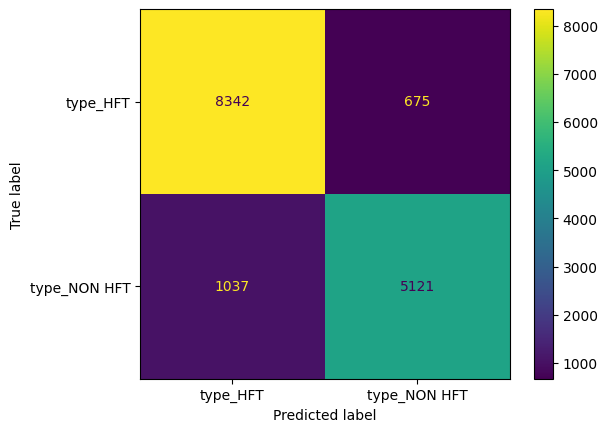

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_0)

In [ ]:
#sobre la matriz de confusión, en el caso de HFT se predijeron mal 675 y en el caso de NON HFF se predijeron mal 1037.
Aunque es una base desbalanceada, se cuenta con una cantidad de importante de cada categoría lo que no afecta de manera importante la predicción de cada una de las categorías.

In [93]:
from sklearn.metrics import log_loss

In [94]:
# Otra salida útil del modelo
model_0.predict_proba(X_test)

array([[0.04984868, 0.95015132],
       [0.97951203, 0.02048797],
       [0.26188785, 0.73811215],
       ...,
       [0.9226272 , 0.0773728 ],
       [0.07167403, 0.92832597],
       [0.66928576, 0.33071424]])

In [95]:
log_loss(y_test, model_0.predict_proba(X_test))

0.2882939516457967

In [98]:
#Análisis de resultados (conclusiones):

Precision: La precisión (precision) es la proporción de instancias clasificadas como positivas (en este caso, "type_HFT") que son realmente positivas. En este resultado, la precisión para la clase "type_HFT" es de aproximadamente 0.89, lo que significa que el 89% de las instancias clasificadas como "type_HFT" son realmente "type_HFT".

Recall: El recall (sensibilidad o tasa de verdaderos positivos) es la proporción de instancias positivas que fueron correctamente identificadas por el modelo. En este resultado, el recall para la clase "type_HFT" es de aproximadamente 0.93, lo que significa que el 93% de las instancias "type_HFT" fueron correctamente identificadas.

F1-score: El F1-score es la media armónica de la precisión y el recall. Es una medida que tiene en cuenta tanto la precisión como el recall para proporcionar una medida única del rendimiento del modelo. En este resultado, el F1-score para la clase "type_HFT" es de aproximadamente 0.91.

Support: Es el número de instancias verdaderas para cada clase en el conjunto de pruebas.

Accuracy: La precisión global del modelo, que es la proporción de instancias correctamente clasificadas sobre el total de instancias. En este resultado, la precisión global (accuracy) es de aproximadamente 0.89, lo que significa que el 89% de las instancias fueron clasificadas correctamente.

Macro avg: Es el promedio sin ponderar de las métricas (precision, recall, F1-score) para ambas clases.

Weighted avg: Es el promedio ponderado de las métricas, donde el peso se calcula en función del número de instancias en cada clase.

En general, estos resultados muestran un buen rendimiento del modelo, con una precisión, recall y F1-score razonablemente altos para ambas clases. Sin embargo, siempre es importante considerar el contexto del problema y el equilibrio entre precisión y recall, dependiendo de las necesidades y objetivos específicos del análisis.

# Puntos extras
Elegí realizar un modelo linel porque:

A. Rendimiento aceptable para relaciones lineales: Cuando la relación entre la variable objetivo y las características es lineal o aproximadamente lineal, el modelo de regresión lineal puede proporcionar resultados precisos y confiables.

Interpretación de coeficientes: Los coeficientes del modelo de regresión lineal representan la contribución de cada característica en la predicción de la variable objetivo, lo que permite identificar qué características tienen un impacto positivo o negativo en la variable objetivo.

Baseline para comparación: El modelo de regresión lineal puede ser utilizado como un modelo de referencia o línea de base (baseline) para comparar con modelos más complejos. Si un modelo más complejo no supera significativamente el rendimiento del modelo de regresión lineal, es posible que no valga la pena utilizar la complejidad adicional.

B. Otro modelo que utilizaría sería es de Analisis de Discriminantes (LDA), ya que el Análisis Discriminante Lineal (LDA por sus siglas en inglés, Linear Discriminant Analysis) es un algoritmo de aprendizaje automático supervisado.

En el aprendizaje automático supervisado,en el que el modelo se entrena utilizando un conjunto de datos etiquetado, donde las etiquetas (o clases) de las muestras son conocidas de antemano. El objetivo es aprender una relación entre las características de las muestras y sus respectivas etiquetas para poder realizar predicciones precisas en datos no etiquetados. Lo mismo que hicimos con la regresión lineal lo podemos realizar para este caso con LDA.

En el caso del Análisis Discriminante Lineal (LDA), el algoritmo se utiliza para encontrar una combinación lineal de características que maximice la separación entre múltiples clases (etiquetas) en un conjunto de datos. La idea es proyectar los datos en un espacio de menor dimensión donde las clases sean lo más separables posible. Luego, se puede utilizar esta proyección para realizar clasificaciones.

